In [3]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import cv2


In [4]:
def fixColor(image):
    return (cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [5]:
label_file = '/cxldata/dlcourse/mask_rcnn_model_data/object_detection_classes_coco.txt'

In [6]:
label_file

'/cxldata/dlcourse/mask_rcnn_model_data/object_detection_classes_coco.txt'

In [7]:
# Get the labels from the file

LABELS = open(label_file).read().strip().split("\n")

In [8]:
LABELS

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [9]:
COLORS = np.random.randint(0,255,size= (len(LABELS), 3), dtype ="uint8")

In [10]:
LABELS[:5]

['person', 'bicycle', 'car', 'motorcycle', 'airplane']

In [11]:
COLORS

array([[102, 220, 225],
       [ 95, 179,  61],
       [234, 203,  92],
       [  3,  98, 243],
       [ 14, 149, 245],
       [ 46, 106, 244],
       [ 99, 187,  71],
       [212, 153, 199],
       [188, 174,  65],
       [153,  20,  44],
       [203, 152, 102],
       [214, 240,  39],
       [121,  24,  34],
       [114, 210,  65],
       [239,  39, 214],
       [244, 151,  25],
       [ 74, 145, 222],
       [ 14, 202,  85],
       [145, 117,  87],
       [184, 189, 221],
       [116, 237, 109],
       [ 85,  99, 172],
       [226, 153, 103],
       [235, 146,  36],
       [151,  62,  68],
       [181, 130, 160],
       [160, 166, 149],
       [  6,  69,   5],
       [ 52, 253, 112],
       [ 14,   1,   3],
       [ 76, 248,  87],
       [233, 212, 184],
       [235, 245,  26],
       [213, 157, 253],
       [ 68, 240,  37],
       [219,  91,  54],
       [129,   9,  51],
       [  0, 191,  20],
       [140,  46, 187],
       [147,   1, 254],
       [ 20, 153, 243],
       [ 46, 160

In [12]:
weights = '/cxldata/dlcourse/mask_rcnn_model_data/mask_rcnn_frozen_inference_graph.pb'

In [13]:
config = '/cxldata/dlcourse/mask_rcnn_model_data/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt'

In [14]:
net = cv2.dnn.readNetFromTensorflow(weights,config)

In [15]:
net

<dnn_Net 0x7fc551a6adb0>

In [16]:
img = cv2.imread('/cxldata/dlcourse/mask_rcnn_model_data/dining_table.jpg')

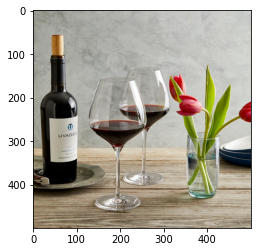

In [17]:
plt.imshow(fixColor(img))

In [18]:
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)

In [19]:
net.setInput(blob)

In [20]:
(boxes, masks_polygons) = net.forward(["detection_out_final","detection_masks"])

In [21]:
boxes.shape

(1, 1, 7, 7)

In [22]:
masks_polygons.shape

(100, 90, 15, 15)

In [24]:
threshold = 0.9

In [25]:
for i in range(0, boxes.shape[2]): #For each detection
    classID = int(boxes[0, 0, i, 1]) #Class ID
    confidence = boxes[0, 0, i, 2] #Confidence scores
    if confidence > threshold:
        (H, W) = img.shape[:2]
        box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H]) #Bounding box
        (startX, startY, endX, endY) = box.astype("int")
        boxW = endX - startX
        boxH = endY - startY

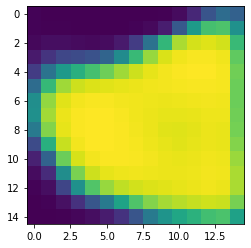

Shape of individual mask (15, 15)


In [26]:
    mask = masks_polygons[i, classID]
    plt.imshow(mask)
    plt.show()
    print("Shape of individual mask", mask.shape)

In [27]:
    mask = cv2.resize(mask, (boxW, boxH), interpolation=cv2.INTER_CUBIC)
    print ("Mask after resize", mask.shape)
    mask = (mask > threshold)

Mask after resize (344, 83)


In [29]:
roi = img[startY:endY, startX:endX][mask]

In [31]:
color = COLORS[classID]
blended = ((0.4 * color) + (0.6 * roi)).astype("uint8")
img[startY:endY, startX:endX][mask] = blended

In [32]:
color = COLORS[classID]
color = [int(c) for c in color]
print (LABELS[classID], color)
cv2.rectangle(img, (startX, startY), (endX, endY), color, 2)
text = "{}: {:.4f}".format(LABELS[classID], confidence)
cv2.putText(img, text, (startX, startY - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

bowl [231, 5, 48]


array([[[147, 153, 152],
        [140, 148, 147],
        [135, 143, 142],
        ...,
        [209, 210, 206],
        [209, 210, 206],
        [202, 206, 201]],

       [[146, 152, 151],
        [138, 146, 145],
        [130, 141, 139],
        ...,
        [208, 212, 207],
        [208, 212, 207],
        [207, 208, 204]],

       [[144, 152, 151],
        [134, 145, 143],
        [131, 142, 140],
        ...,
        [210, 211, 207],
        [211, 212, 208],
        [208, 212, 207]],

       ...,

       [[ 35,  58,  90],
        [ 22,  49,  83],
        [ 32,  63, 102],
        ...,
        [174, 190, 197],
        [162, 181, 188],
        [180, 196, 203]],

       [[ 60,  90, 119],
        [ 53,  80, 101],
        [ 66,  93, 120],
        ...,
        [136, 154, 161],
        [158, 177, 184],
        [150, 166, 173]],

       [[ 70, 110, 138],
        [ 63,  93, 120],
        [ 66,  96, 123],
        ...,
        [114, 133, 140],
        [144, 156, 162],
        [142, 156, 162]]

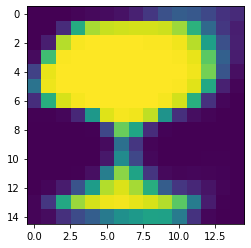

Shape of individual mask (15, 15)
Mask after resize (328, 148)
Mask after threshold (328, 148)
ROI Shape (12764, 3)
wine glass [156, 21, 112]


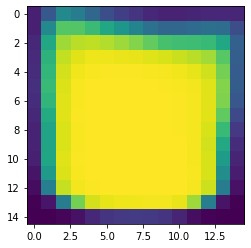

Shape of individual mask (15, 15)
Mask after resize (154, 81)
Mask after threshold (154, 81)
ROI Shape (6072, 3)
vase [166, 56, 167]


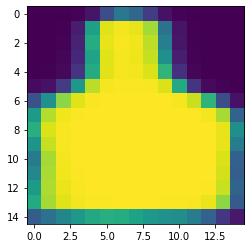

Shape of individual mask (15, 15)
Mask after resize (344, 83)
Mask after threshold (344, 83)
ROI Shape (13497, 3)
bottle [209, 226, 77]


In [35]:
for i in range(0, boxes.shape[2]): #For each detection
    classID = int(boxes[0, 0, i, 1]) #Class ID
    confidence = boxes[0, 0, i, 2] #Confidence scores
    if confidence > threshold:
        (H, W) = img.shape[:2]
        box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H]) #Bounding box
        (startX, startY, endX, endY) = box.astype("int")
        boxW = endX - startX
        boxH = endY - startY

        # extract the pixel-wise segmentation for the object, and visualize the mask       
        mask = masks_polygons[i, classID]
        plt.imshow(mask)
        plt.show()
        print ("Shape of individual mask", mask.shape)

        # resize the mask such that it's the same dimensions of
        # the bounding box, and interpolation gives individual pixel positions
        mask = cv2.resize(mask, (boxW, boxH), interpolation=cv2.INTER_CUBIC)

        print ("Mask after resize", mask.shape)
        # then finally threshold to create a *binary* mask
        mask = (mask > threshold)
        print ("Mask after threshold", mask.shape)
        # extract the ROI of the image but *only* extracted the
        # masked region of the ROI
        roi = img[startY:endY, startX:endX][mask]
        print ("ROI Shape", roi.shape)

        # grab the color used to visualize this particular class,
        # then create a transparent overlay by blending the color
        # with the ROI
        color = COLORS[classID]
        blended = ((0.4 * color) + (0.6 * roi)).astype("uint8")

        # Change the colors in the original to blended color
        img[startY:endY, startX:endX][mask] = blended

        color = COLORS[classID]
        color = [int(c) for c in color]
        print (LABELS[classID], color)
        cv2.rectangle(img, (startX, startY), (endX, endY), color, 2)
        text = "{}: {:.4f}".format(LABELS[classID], confidence)
        cv2.putText(img, text, (startX, startY - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

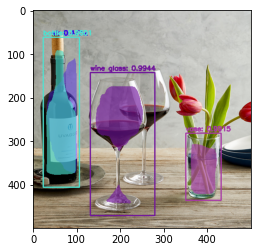

In [36]:
plt.imshow(fixColor(img))